In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


In [2]:
fashion_mnist_df = pd.read_csv('datasets/fashion-mnist_train.csv')
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
fashion_mnist_df.shape

(60000, 785)

In [4]:
fashion_mnist_df = fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)

In [5]:
fashion_mnist_df.shape

(18000, 785)

In [6]:
LOOKUP = {0: 'T-shirt',
          1: 'Trouser',
          2: 'Pullover',
          3: 'Dress',
          4: 'Coat',
          5: 'Sandal',
          6: 'Shirt',
          7: 'Sneaker',
          8: 'Bag',
          9: 'Ankle boot'}

In [7]:
def display_image(features, actual_lable):
    print("Actual label: ", LOOKUP[actual_lable])
    
    plt.imshow(features.reshape(28, 28))

In [9]:
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]
Y = fashion_mnist_df['label']

In [10]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,48,92,...,0,0,0,0,105,77,4,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
Y.head()


0    9
1    9
2    9
3    2
4    3
Name: label, dtype: int64

In [12]:
X.loc[5].values[:100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        35,  61,  56,   0,   1,   1,   2,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         0, 146, 150,  13, 160, 137,   0,   0,   0,   2,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         5,   0,  95, 132,   0,   0,   0, 118,  86,   0,   3,   2,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   2,   0,   0, 146,  20,   0,   3,   0])

In [14]:
Y.loc[5]

8

Actual label:  Bag


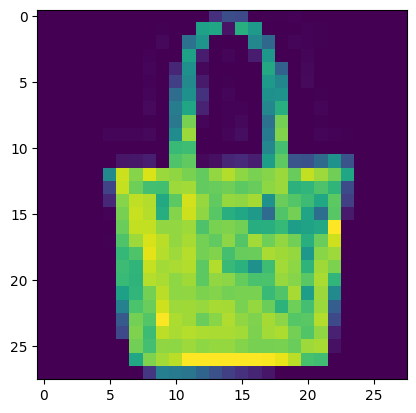

In [15]:
display_image(X.loc[5].values, Y.loc[5])

Actual label:  Pullover


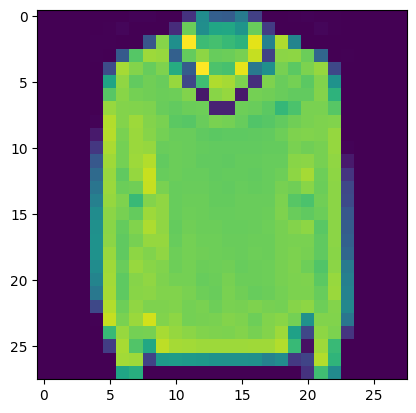

In [16]:
display_image(X.loc[567].values, Y.loc[567])

In [17]:
X = X/255.
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188235,0.360784,...,0.0,0.0,0.0,0.0,0.411765,0.301961,0.015686,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

x_test.shape, y_test.shape

((3600, 784), (3600,))

In [19]:
x_train.shape, y_train.shape

((14400, 784), (14400,))

In [20]:
def summarize_classification(y_test, y_pred, avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    
    prec = precision_score(y_test, y_pred, average=avg_method)
    recall = recall_score(y_test, y_pred, average=avg_method)
    
    print("Test data count: ", len(y_test))
    print('Accuracy count: ', num_acc)
    print('Accuracy score: ', acc)
    print('Precision score: ', prec)
    print('Recall score: ', recall)

'sag' is optimization algorithm to handle multinomial loss for multiclass classifications, converges faster for
large datasets
'liblinea' solver does not handle multinominal loss, performs multiclass classification using one-versus-rest scheme

In [21]:
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

In [22]:
y_pred = logistic_model.predict(x_test)
y_pred

array([3, 4, 3, ..., 5, 9, 5])

In [23]:
summarize_classification(y_test, y_pred)

Test data count:  3600
Accuracy count:  3054
Accuracy score:  0.8483333333333334
Precision score:  0.8498097646151656
Recall score:  0.8483333333333334
